In [83]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
  

In [84]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import figure
from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [87]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aben_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aben_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aben_\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aben_\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [88]:
stop = set(stopwords.words('english'))
for w in ['wa','ha','us','place','translated','great','people','church','aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn']:
    STOPWORDS.add(w)

In [89]:
def read_reviews(folder,fname):
    test=pd.read_csv(folder + fname )
    return test['review'].str.cat(sep=' ').replace('\n', ' ')

In [90]:
def lemmatize(string,on_off):
    if on_off == 0:
        return string
    if on_off == 1:
        lemmatizer = WordNetLemmatizer()
        lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(string)])
        return lemmatized_output

In [91]:
def read_all(denom,lem):
    df = pd.DataFrame(columns =['church','reviews','denomination'])
 
    for key, value in denom.items():
        mypath='C:/Users/aben_/Documents/ISYE 6740/Homework/project/' + key + '/'
        files = [f for f in listdir(mypath) if isfile(join(mypath, f))]
        for file in files:
            review_text = lemmatize(read_reviews(mypath,file),lem)
            row_to_append = pd.DataFrame([{'church':file.split('.')[0], 'reviews':review_text,"denomination": value}])
            df = pd.concat([df,row_to_append])
    return df

In [92]:
def get_bow(df):
    #word cloud by word count (DTM)
    cv=CountVectorizer(stop_words=STOPWORDS, ngram_range=(1, 1))
    bag_of_words = cv.fit_transform(all_text['reviews'])
    bag_of_words = pd.DataFrame(bag_of_words.toarray(),columns = cv.get_feature_names_out ())
    return bag_of_words

In [93]:
denominations = {'pca': 1}

In [94]:
all_text=read_all(denominations,0)
all_text

,church,reviews,denomination
0,pca0,1 STAR: As a former member of Uptown I loved ...,1
0,pca1,After 4 years I'm over this place. They are su...,1
0,pca10,Our family has been attending for almost a dec...,1
0,pca11,First visit today 8/26/18. Awesome that the fu...,1
0,pca12,"Very friendly, warm and inviting. Would recomm...",1
...,...,...,...
0,pca95,I am very thankful for this church. I attend ...,1
0,pca96,Great Church with faithful expository preachin...,1
0,pca97,I just pulled in to their parking lot to rest ...,1
0,pca98,Great reformed small church. Lots of young fam...,1


In [95]:
bow=get_bow(all_text)
bow

,00,0000,00am,00pm,10,100,10a,10am,10th,11,...,말씀이,사랑으로,사랑하고,살리는교회,살아서,서로,애쓰는교회입니다,주님에,특별히,항상깨어서
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
import pandas
from sklearn.decomposition import PCA
import numpy
import matplotlib.pyplot as plot
from sklearn.decomposition import TruncatedSVD 
from sklearn.feature_extraction.text import TfidfVectorizer


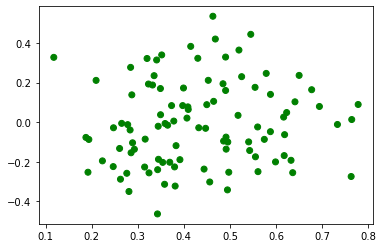

In [97]:
v = TfidfVectorizer(max_features=50,ngram_range=(1,1),use_idf=False,sublinear_tf=False, max_df=.3,stop_words=STOPWORDS)
x = v.fit_transform(all_text['reviews'])
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
principalComponents = svd.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

principalDf_concat = pd.concat([all_text.reset_index(),principalDf.reset_index()], axis=1)
colors = {0:'red', 1:'green', 2:'blue'}


fig = plt.figure()
ax = fig.add_subplot(111)

x = principalDf_concat.iloc[:,5]
y = principalDf_concat.iloc[:,6]

ax.scatter(x, y,c = principalDf_concat['denomination'].map(colors))
plt.show()


In [98]:
feature_names = v.get_feature_names_out()
best_features = [feature_names[i] for i in svd.components_[0].argsort()[::-1]]
best_features

['children',
 'time',
 'solid',
 'come',
 'excellent',
 'well',
 'life',
 'first',
 'sound',
 'loving',
 'lord',
 'presbyterian',
 'music',
 'recommend',
 'small',
 'kind',
 'feel',
 'services',
 'welcome',
 'many',
 'going',
 'reformed',
 'centered',
 'staff',
 'everyone',
 'always',
 'school',
 'preached',
 'truly',
 'even',
 'thank',
 'best',
 'faith',
 'loved',
 'part',
 'christian',
 'highly',
 'group',
 'pastors',
 'find',
 'sermons',
 'much',
 'blessed',
 'message',
 'believers',
 'know',
 'make',
 'truth',
 'experience',
 'ministry']

In [101]:
X_tfidf = v.fit_transform(all_text['reviews']).toarray()
vocab = v.vocabulary_
reverse_vocab = {v:k for k,v in vocab.items()}

feature_names = v.get_feature_names_out()
df_tfidf = pd.DataFrame(X_tfidf, columns = feature_names)

idx = X_tfidf.argsort(axis=1)

tfidf_max25 = idx[:,-25:]

df_tfidf['top25'] = [[reverse_vocab.get(item) for item in row] for row in tfidf_max25]

df_tfidf['top25'] 

0     [blessed, best, believers, ministry, always, l...
1     [best, blessed, centered, children, christian,...
2     [lord, believers, best, centered, children, ch...
3     [even, know, everyone, excellent, best, experi...
4     [believers, blessed, centered, children, chris...
                            ...                        
95    [centered, children, truly, come, even, everyo...
96    [believers, best, blessed, centered, children,...
97    [believers, blessed, centered, christian, come...
98    [believers, best, blessed, centered, children,...
99    [going, even, excellent, experience, staff, fe...
Name: top25, Length: 100, dtype: object

In [102]:
global_top25_idx = X_tfidf.max(axis=0).argsort()[-25:]
np.asarray(feature_names)[global_top25_idx]

array(['group', 'everyone', 'truth', 'school', 'feel', 'faith', 'blessed',
       'children', 'always', 'part', 'going', 'centered', 'believers',
       'preached', 'loving', 'staff', 'come', 'lord', 'small', 'even',
       'music', 'services', 'reformed', 'highly', 'solid'], dtype=object)